# **Problem Statement - Coded Project**

An over-the-top (OTT) media service is a media service offered directly to viewers via the internet. The term is most synonymous with subscription-based video-on-demand services that offer access to film and television content, including existing series acquired from other producers, as well as original content produced specifically for the service. They are typically accessed via websites on personal computers, apps on smartphones and tablets, or televisions with integrated Smart TV platforms.

Presently, OTT services are at a relatively nascent stage and are widely accepted as a trending technology across the globe. With the increasing change in customers' social behavior, which is shifting from traditional subscriptions to broadcasting services and OTT on-demand video and music subscriptions every year, OTT streaming is expected to grow at a very fast pace. The global OTT market size was valued at Dollar 121.61 billion in 2019 and is projected to reach Dollar 1,039.03 billion by 2027, growing at a CAGR of 29.4% from 2020 to 2027. The shift from television to OTT services for entertainment is driven by benefits such as on-demand services, ease of access, and access to better networks and digital connectivity.

With the outbreak of COVID19, OTT services are striving to meet the growing entertainment appetite of viewers, with some platforms already experiencing a 46% increase in consumption and subscriber count as viewers seek fresh content. With innovations and advanced transformations, which will enable the customers to access everything they want in a single space, OTT platforms across the world are expected to increasingly attract subscribers on a concurrent basis.

# **Objective**
ShowTime is an OTT service provider and offers a wide variety of content (movies, web shows, etc.) for its users. They want to determine the driver variables for first-day content viewership so that they can take necessary measures to improve the viewership of the content on their platform. Some of the reasons for the decline in viewership of content would be the decline in the number of people coming to the platform, decreased marketing spend, content timing clashes, weekends and holidays, etc. They have hired you as a Data Scientist, shared the data of the current content in their platform, and asked you to analyze the data and come up with a linear regression model to determine the driving factors for first-day viewership.

# **Data Description**

The data contains the different factors to analyze for the content. The detailed data dictionary is given below.

**Data Dictionary:**

*   visitors: Average number of visitors, in millions, to the platform in the past week
*   ad_impressions: Number of ad impressions, in millions, across all ad campaigns for the content (running and completed)
*   major_sports_event: Any major sports event on the day
*   genre: Genre of the content
*   dayofweek: Day of the release of the content
*   season: Season of the release of the content
*   views_trailer: Number of views, in millions, of the content trailer
*   views_content: Number of first-day views, in millions, of the content










# **Data Overview**

The initial steps to get an overview of any dataset is to:

- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not

- get information about the number of rows and columns in the dataset

- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.

- check the statistical summary of the dataset to get an overview of the numerical columns of the data

In [1]:
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/ottdata.csv')

Mounted at /content/drive


In [2]:
data.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


In [ ]:
data.tail()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
995,1.58,1311.96,0,Romance,Friday,Fall,48.58,0.36
996,1.34,1329.48,0,Action,Friday,Summer,72.42,0.56
997,1.62,1359.80,1,Sci-Fi,Wednesday,Fall,150.44,0.66
998,2.06,1698.35,0,Romance,Monday,Summer,48.72,0.47
999,1.36,1140.23,0,Comedy,Saturday,Summer,52.94,0.49


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [4]:
data.describe()

,visitors,ad_impressions,major_sports_event,views_trailer,views_content
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1.704290,1434.712290,0.400000,66.91559,0.473400
std,0.231973,289.534834,0.490143,35.00108,0.105914
min,1.250000,1010.870000,0.000000,30.08000,0.220000
25%,1.550000,1210.330000,0.000000,50.94750,0.400000
50%,1.700000,1383.580000,0.000000,53.96000,0.450000
75%,1.830000,1623.670000,1.000000,57.75500,0.520000
max,2.340000,2424.200000,1.000000,199.92000,0.890000


In [5]:
data.shape

(1000, 8)

# **Sanity check**

## **Missing values**

In [ ]:
data.isnull().sum()

,0
visitors,0
ad_impressions,0
major_sports_event,0
genre,0
dayofweek,0
season,0
views_trailer,0
views_content,0


## **Duplicate Values**

In [ ]:
data = pd.DataFrame(data)
duplicates = data[data.duplicated()]
if not duplicates.empty:
    print("Duplicates found!")
else:
    print("No duplicates found.")

No duplicates found.


# **Univariate Analysis**

#### **Distribution of content views**

''

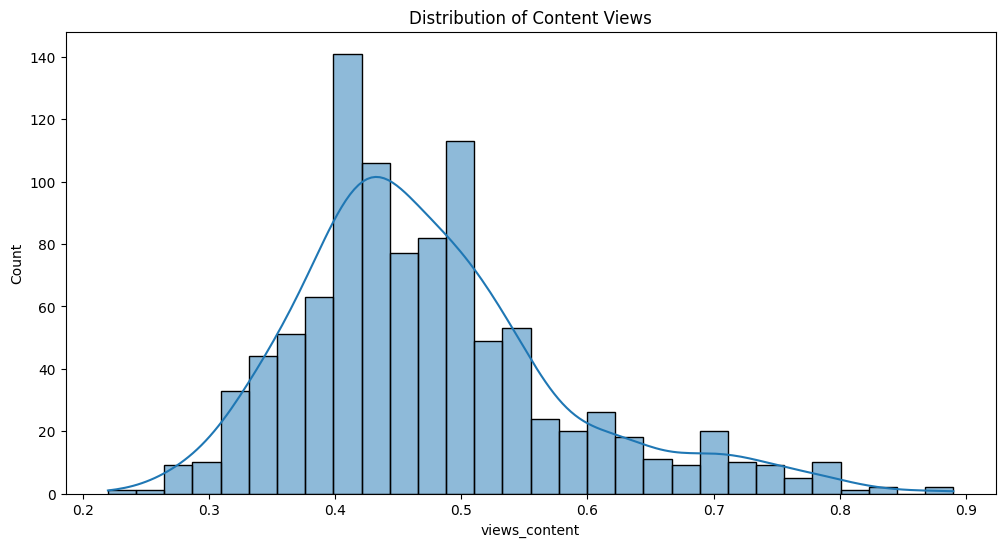

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data['views_content'], bins=30, kde=True)
plt.title('Distribution of Content Views')
;


<Axes: ylabel='views_content'>

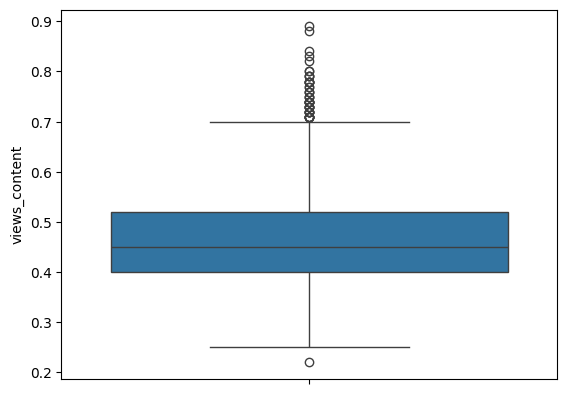

In [ ]:
sns.boxplot(data['views_content'])

#### **Distribution of Genres**

Text(0.5, 1.0, 'Distribution of Genres')

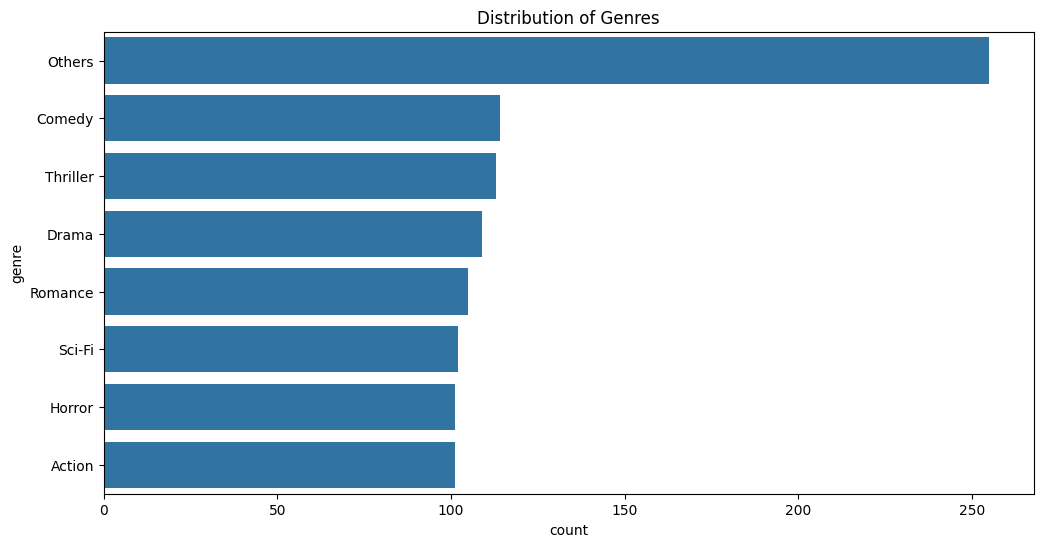

In [ ]:
# Distribution of Genres
plt.figure(figsize=(12, 6))
sns.countplot(y='genre', data=data, order=data['genre'].value_counts().index)
plt.title('Distribution of Genres')

#### **Distribution of Ad Impressions**

Text(0.5, 1.0, 'Distribution of Ad Impressions')

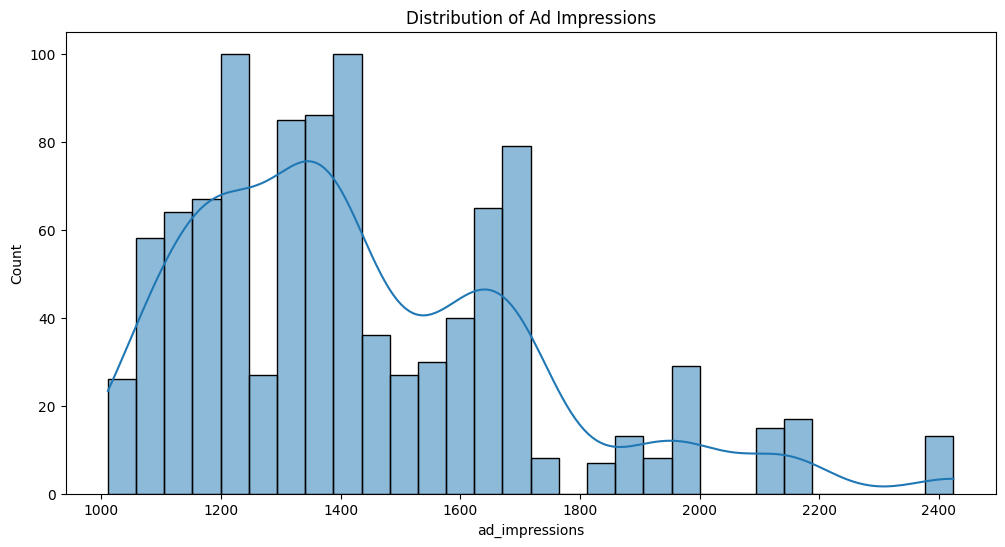

In [ ]:
# Distribution of Ad Impressions
plt.figure(figsize=(12, 6))
sns.histplot(data['ad_impressions'], bins=30, kde=True)
plt.title('Distribution of Ad Impressions')

#### **Distribution of Trailer Views**

Text(0.5, 1.0, 'Distribution of Trailer Views')

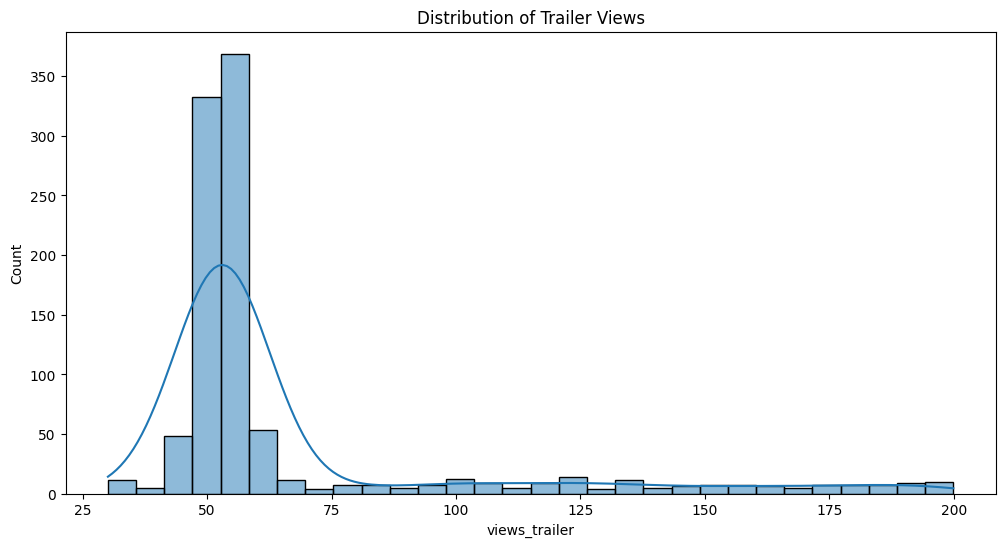

In [ ]:
# Distribution of Trailer Views
plt.figure(figsize=(12, 6))
sns.histplot(data['views_trailer'], bins=30, kde=True)
plt.title('Distribution of Trailer Views')

#### **Distribution of Visitors**

Text(0.5, 1.0, 'Distribution of Visitors')

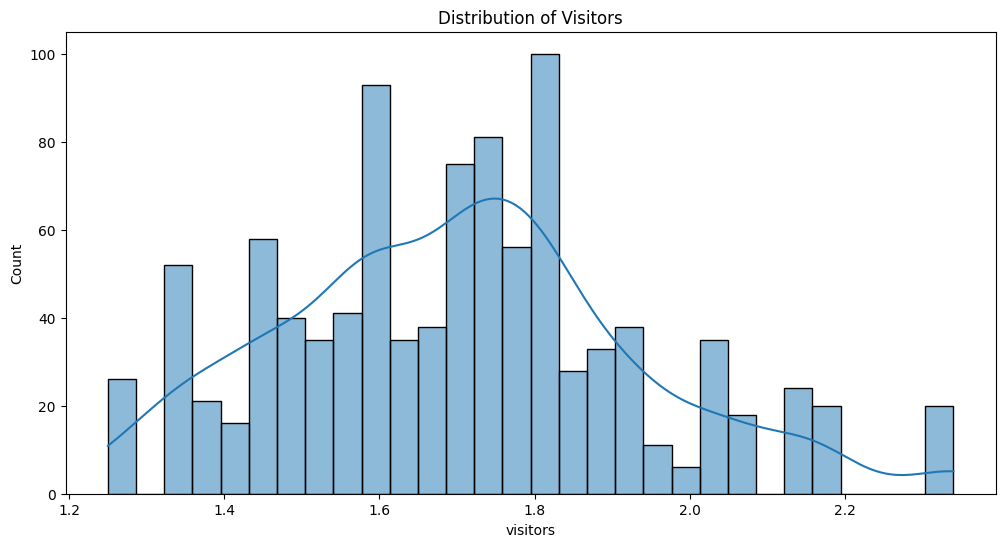

In [ ]:
# Distribution of Visitors
plt.figure(figsize=(12, 6))
sns.histplot(data['visitors'], bins=30, kde=True)
plt.title('Distribution of Visitors')

#### **Distribution of Major Sports Events**

Text(0.5, 1.0, 'Distribution of Major Sports Events')

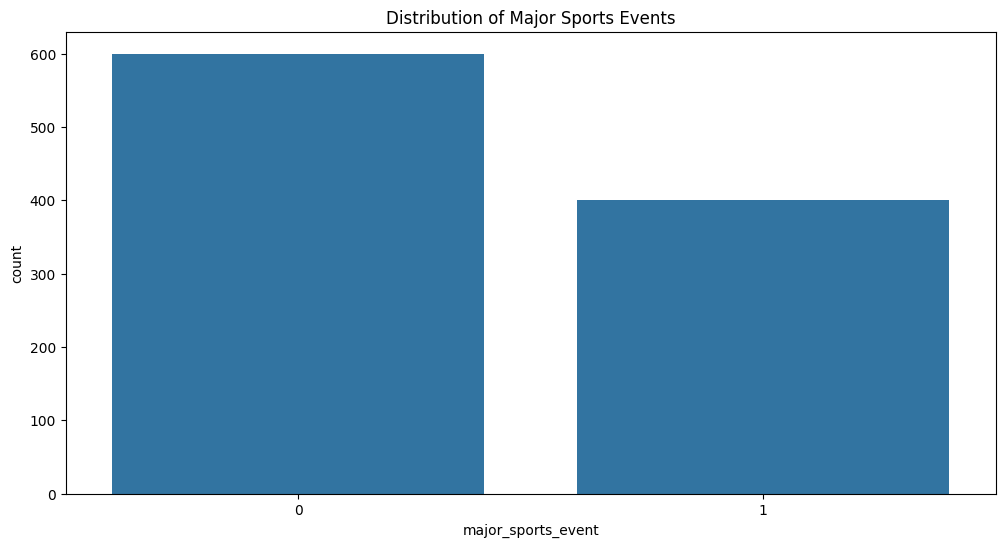

In [ ]:
# Major Sports Events
plt.figure(figsize=(12, 6))
sns.countplot(x='major_sports_event', data=data)
plt.title('Distribution of Major Sports Events')

# **Bivariate Analysis**

#### **Viewership vs. Ad Impressions**

''

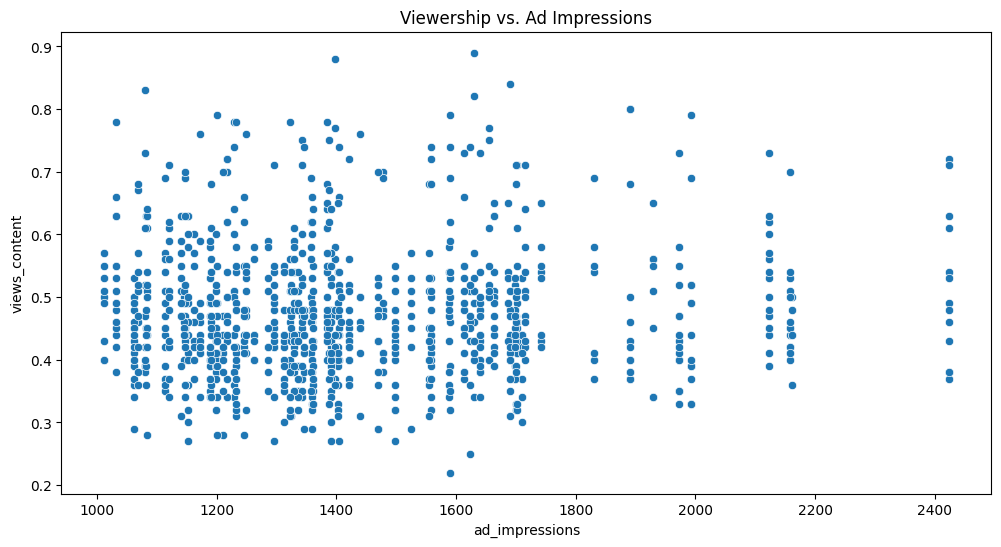

In [ ]:
# Viewership vs. Ad Impressions
plt.figure(figsize=(12, 6))
sns.scatterplot(x='ad_impressions', y='views_content', data=data)
plt.title('Viewership vs. Ad Impressions')
;

#### **Viewership vs. Trailer Views**

Text(0.5, 1.0, 'Viewership vs. Trailer Views')

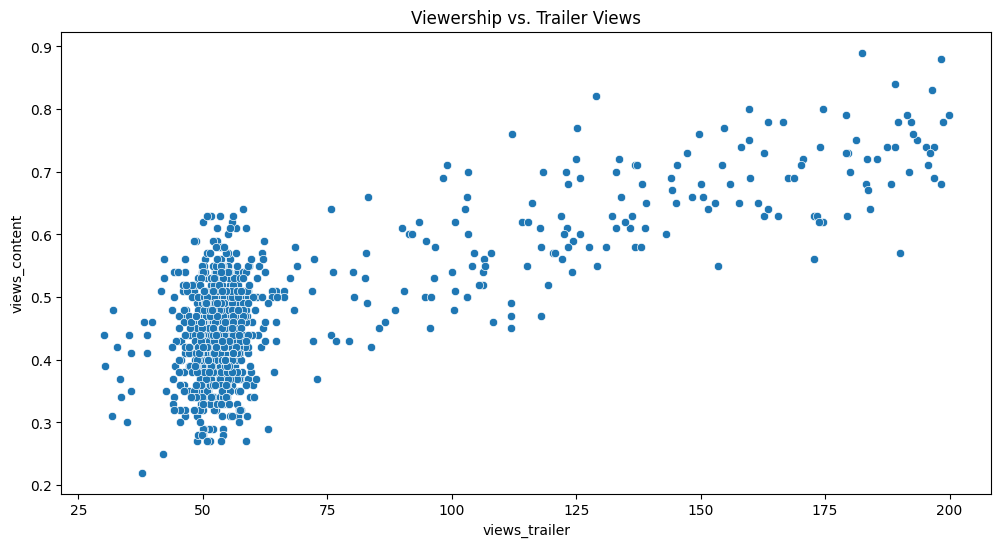

In [ ]:
# Viewership vs. Trailer Views
plt.figure(figsize=(12, 6))
sns.scatterplot(x='views_trailer', y='views_content', data=data)
plt.title('Viewership vs. Trailer Views')

#### **Viewership by Genre**

Text(0.5, 1.0, 'Viewership by Genre')

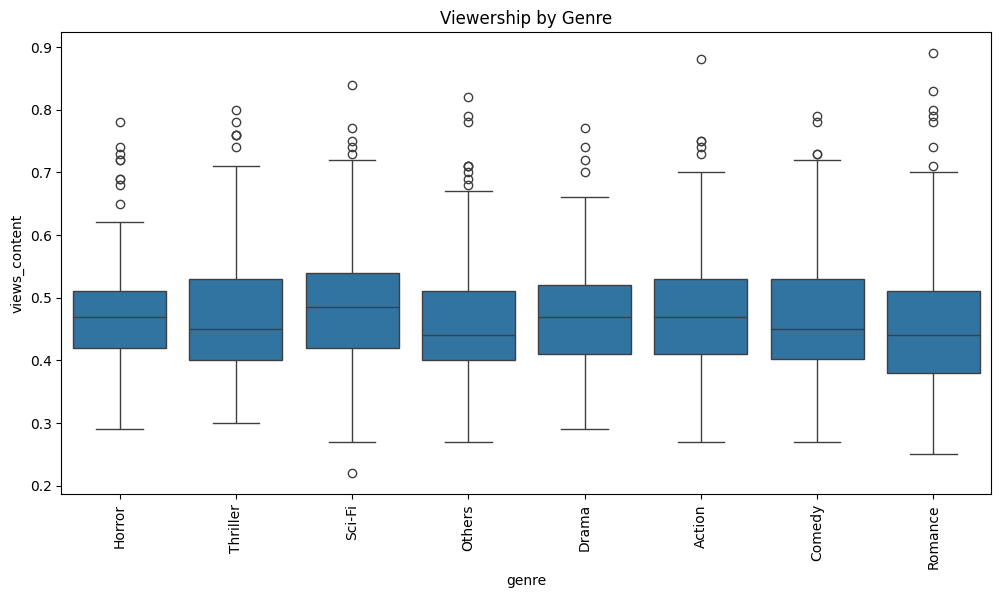

In [ ]:
# Viewership by Genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='views_content', data=data)
plt.xticks(rotation=90)
plt.title('Viewership by Genre')

#### **Viewership by Day of the Week**

Text(0.5, 1.0, 'Viewership by Day of the Week')

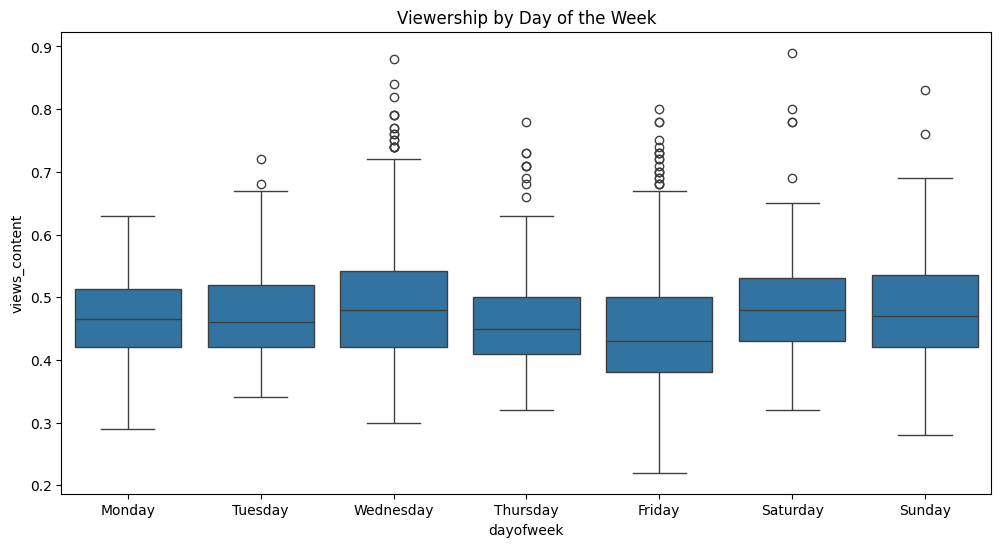

In [ ]:
# Viewership by Day of the Week
plt.figure(figsize=(12, 6))
sns.boxplot(x='dayofweek', y='views_content', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Viewership by Day of the Week')

#### **Viewership by Season**

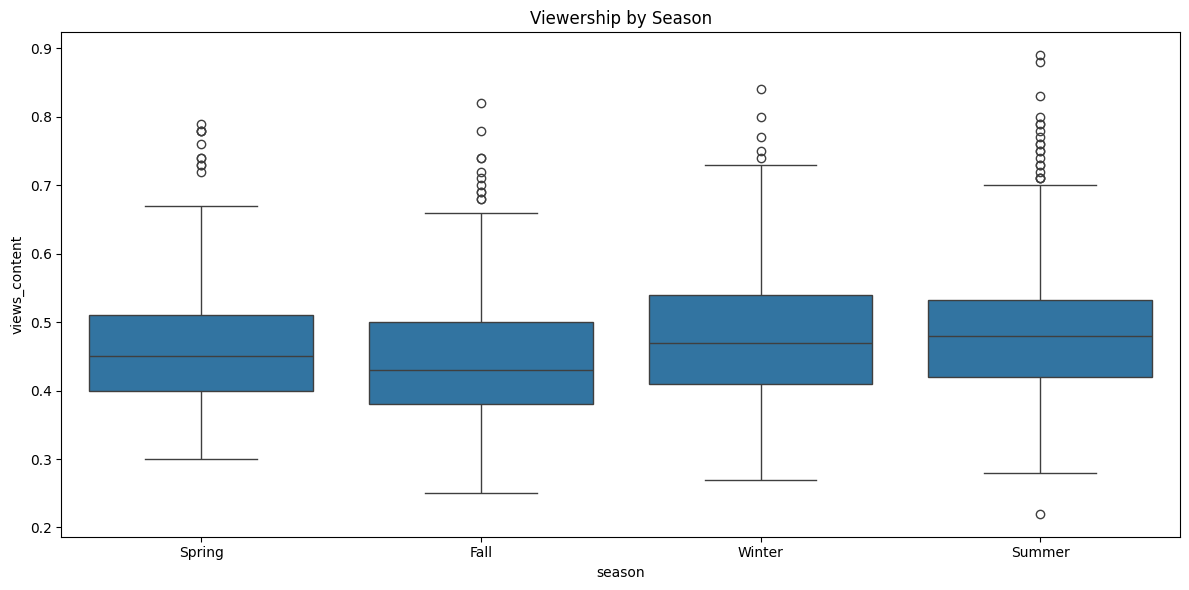

In [ ]:
# Viewership by Season
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='views_content', data=data)
plt.title('Viewership by Season')

plt.tight_layout()
plt.show()

#### **Ad Impressions vs Trailer_Viewership**

Text(0.5, 1.0, 'Trailer_Viewership vs Ad impressions')

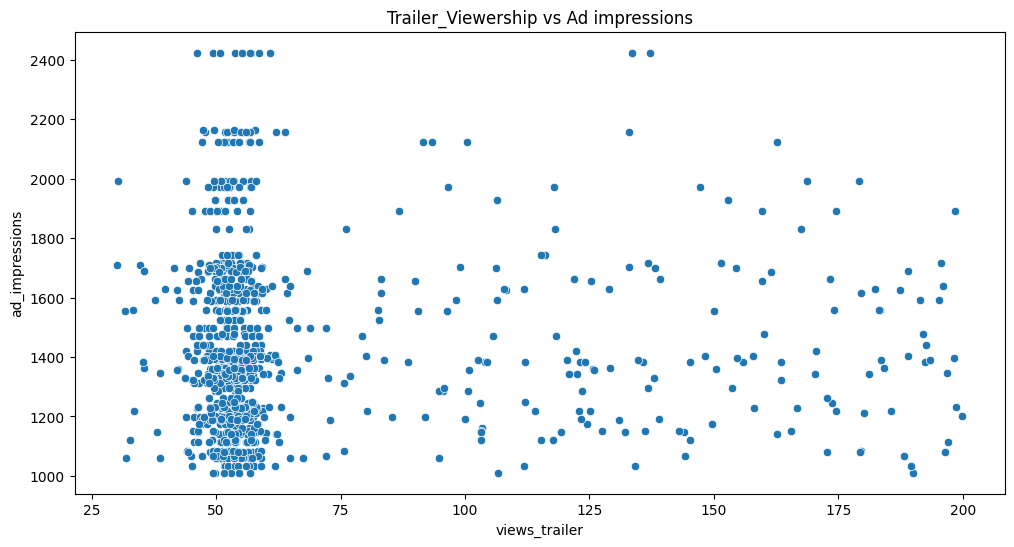

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='views_trailer', y='ad_impressions', data=data)
plt.title('Trailer_Viewership vs Ad impressions')

#### **Correlation Analysis**

In [6]:
# Correlation Analysis
correlation_matrix = data[['ad_impressions', 'views_trailer', 'visitors', 'views_content']].corr()
print(correlation_matrix)

                ad_impressions  views_trailer  visitors  views_content
ad_impressions        1.000000       0.009446  0.030472       0.050022
views_trailer         0.009446       1.000000 -0.028930       0.753962
visitors              0.030472      -0.028930  1.000000       0.259136
views_content         0.050022       0.753962  0.259136       1.000000


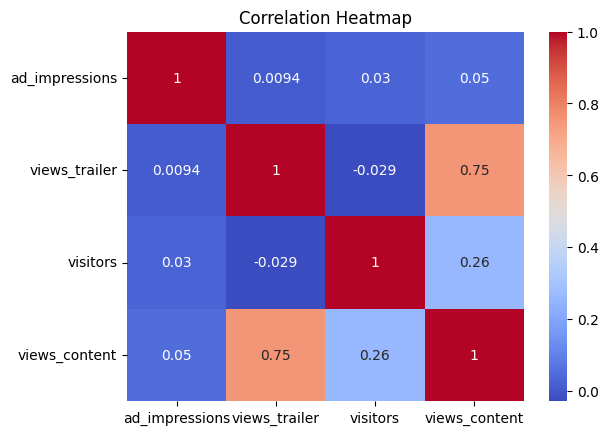

In [7]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
correlation_matrix_1 = data[['views_trailer', 'views_content']].corr()
print(correlation_matrix_1)

               views_trailer  views_content
views_trailer       1.000000       0.753962
views_content       0.753962       1.000000


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

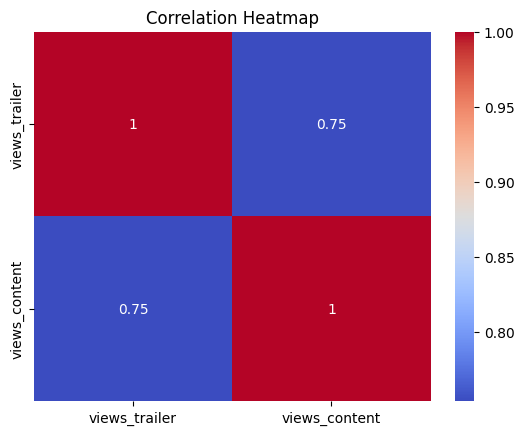

In [9]:
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt

**Using all the codes at once to get a consolidated graph**

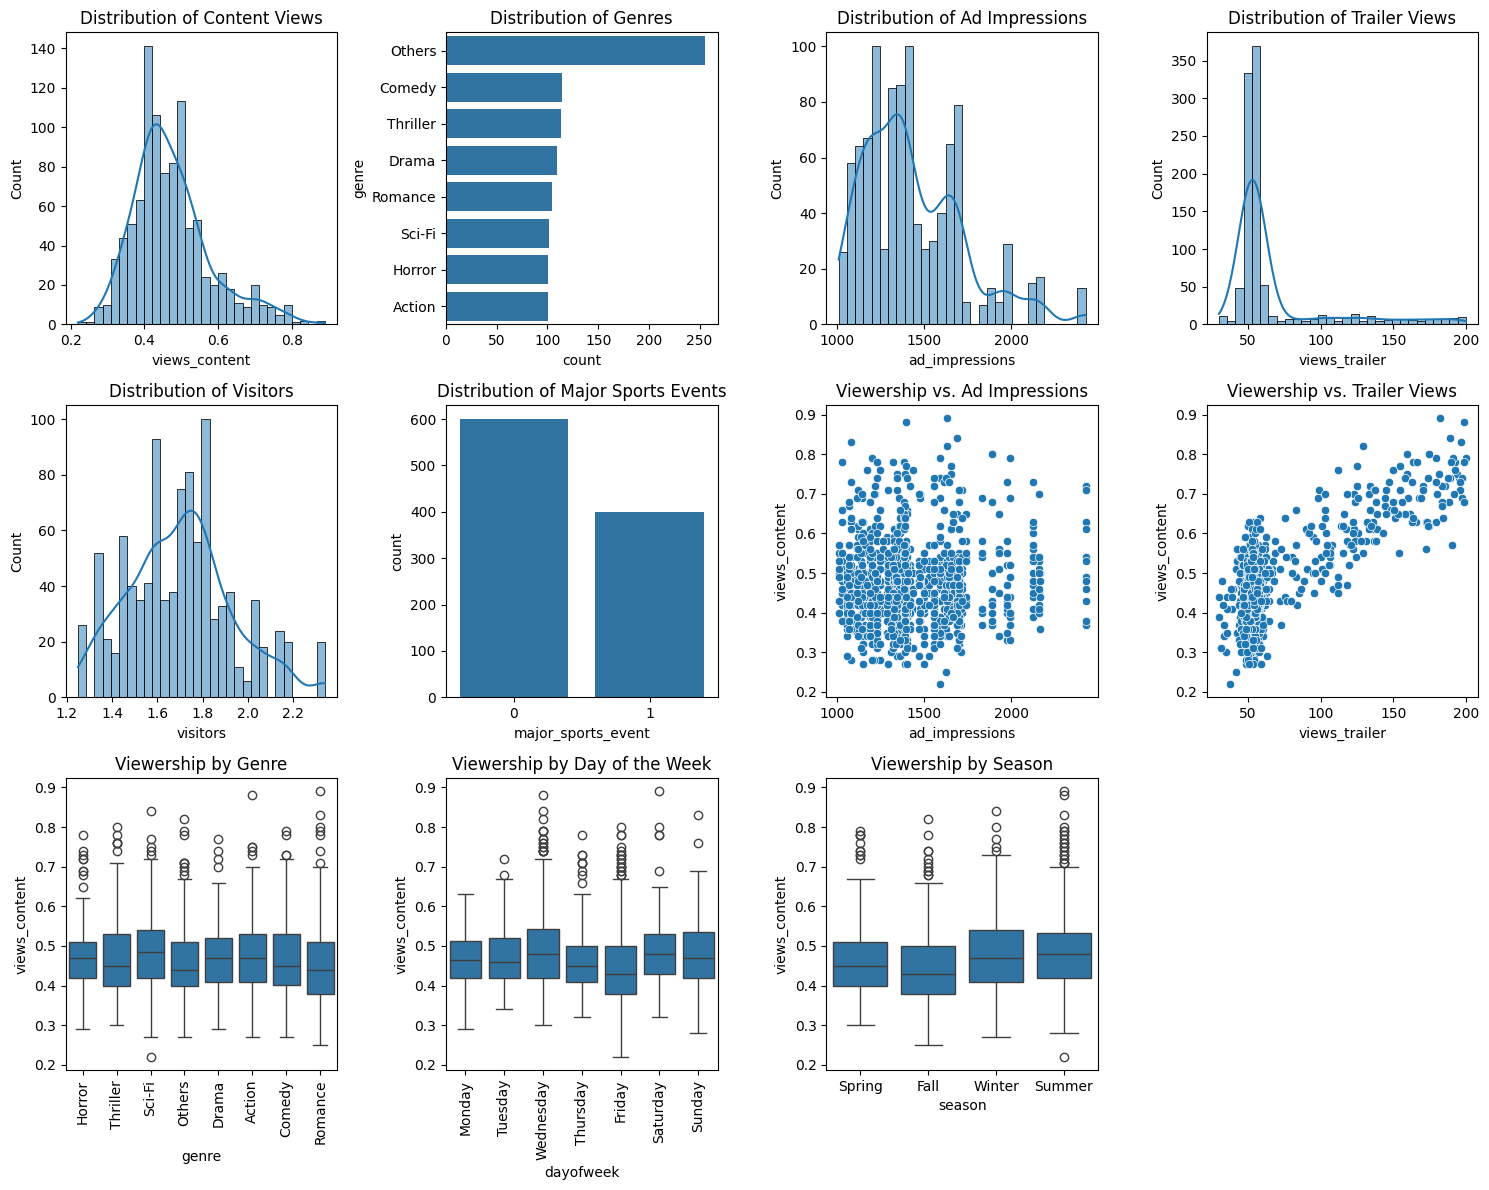

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis
plt.figure(figsize=(15, 12))

# Distribution of Content Views
plt.subplot(3, 4, 1)
sns.histplot(data['views_content'], bins=30, kde=True)
plt.title('Distribution of Content Views')

# Distribution of Genres
plt.subplot(3, 4, 2)
sns.countplot(y='genre', data=data, order=data['genre'].value_counts().index)
plt.title('Distribution of Genres')

# Distribution of Ad Impressions
plt.subplot(3, 4, 3)
sns.histplot(data['ad_impressions'], bins=30, kde=True)
plt.title('Distribution of Ad Impressions')

# Distribution of Trailer Views
plt.subplot(3, 4, 4)
sns.histplot(data['views_trailer'], bins=30, kde=True)
plt.title('Distribution of Trailer Views')

# Distribution of Visitors
plt.subplot(3, 4, 5)
sns.histplot(data['visitors'], bins=30, kde=True)
plt.title('Distribution of Visitors')

# Major Sports Events
plt.subplot(3, 4, 6)
sns.countplot(x='major_sports_event', data=data)
plt.title('Distribution of Major Sports Events')

# Bivariate Analysis
# Viewership vs. Ad Impressions
plt.subplot(3, 4, 7)
sns.scatterplot(x='ad_impressions', y='views_content', data=data)
plt.title('Viewership vs. Ad Impressions')

# Viewership vs. Trailer Views
plt.subplot(3, 4, 8)
sns.scatterplot(x='views_trailer', y='views_content', data=data)
plt.title('Viewership vs. Trailer Views')

# Viewership by Genre
plt.subplot(3, 4, 9)
sns.boxplot(x='genre', y='views_content', data=data)
plt.xticks(rotation=90)
plt.title('Viewership by Genre')

# Viewership by Day of the Week
plt.subplot(3, 4, 10)
sns.boxplot(x='dayofweek', y='views_content', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xticks(rotation=90)
plt.title('Viewership by Day of the Week')

# Viewership by Season
plt.subplot(3, 4, 11)
sns.boxplot(x='season', y='views_content', data=data)
plt.title('Viewership by Season')

plt.tight_layout()
plt.show()


#### **Outlier Treatment**

In [11]:
import numpy as np

# Function to detect and handle outliers
def detect_and_handle_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Number of outliers in {column}: {len(outliers)}")

    # Option to remove outliers
    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_clean

# Apply outlier treatment
data = detect_and_handle_outliers(data, 'ad_impressions')
data = detect_and_handle_outliers(data, 'views_trailer')
data = detect_and_handle_outliers(data, 'visitors')
data = detect_and_handle_outliers(data, 'views_content')

Number of outliers in ad_impressions: 13
Number of outliers in views_trailer: 187
Number of outliers in visitors: 13
Number of outliers in views_content: 1


# **Feature Enginerering**

In [10]:
# Convert categorical variables to numerical (one-hot encoding)
data = pd.get_dummies(data, columns=['genre', 'dayofweek', 'season', 'major_sports_event'], drop_first=True)

# Example: Interaction feature (interaction between ad impressions and trailer views)
data['ad_trailer_interaction'] = data['ad_impressions'] * data['views_trailer']

# Example: Log transformation to handle skewness
data['views_content_log'] = np.log1p(data['views_content'])

# **Data Preparation for modelling**

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target
X = data.drop(['views_content', 'views_content_log'], axis=1)  # Features
y = data['views_content_log']  # Target (log-transformed viewership)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preparation is complete.")

Data preparation is complete.


# **Model Building**

#### **Import libraries**

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [16]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Model statistics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Model coefficients
coefficients = model.coef_
intercept = model.intercept_

# Create a DataFrame for coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

print("\nModel Coefficients:")
print(coef_df.sort_values(by='Coefficient', ascending=False))

Mean Squared Error: 0.00
R-squared: 0.49

Model Coefficients:
                   Feature  Coefficient
0                 visitors     0.017404
15     dayofweek_Wednesday     0.014643
17           season_Summer     0.014569
11      dayofweek_Saturday     0.010166
18           season_Winter     0.008882
16           season_Spring     0.008137
12        dayofweek_Sunday     0.005898
2            views_trailer     0.004887
20  ad_trailer_interaction     0.003999
8             genre_Sci-Fi     0.003389
13      dayofweek_Thursday     0.003026
10        dayofweek_Monday     0.002440
14       dayofweek_Tuesday     0.002199
6             genre_Others     0.002141
5             genre_Horror     0.002113
9           genre_Thriller     0.002018
3             genre_Comedy     0.001473
4              genre_Drama     0.000845
7            genre_Romance    -0.001933
1           ad_impressions    -0.003457
19    major_sports_event_1    -0.020196


#### **Model Performance**

**Mean Squared Error (MSE): 0.00**

**Interpretation**:

Indicates perfect prediction, but should be verified as it may suggest data issues or overfitting.

**R-squared (R²): 0.49**

**Interpretation:**

The model explains 49% of the variance in first-day viewership. This indicates moderate explanatory power.

#### **Model Coefficients**

**Positive Impact:**

visitors (0.0174): More visitors increase first-day viewership.
dayofweek_Wednesday (0.0146) & season_Summer (0.0146): Higher viewership on Wednesdays and in summer.

**Negative Impact:**

major_sports_event_1 (-0.0202): Major sports events reduce viewership.

**Small Effects:**

genre_Romance (-0.0019): Slightly reduces viewership compared to the baseline genre.

**Insights**

The model moderately predicts viewership with some features positively and negatively impacting first-day views.
The exact zero MSE needs verification for accuracy.

# **Testing the assumptions of linear regression model**

To ensure that your linear regression model is valid, it's crucial to test its underlying assumptions. These assumptions include:

1. **Linearity**
2. **Independence**
3. **Homoscedasticity (constant variance of errors)**
4. **Normality of Residuals**

## **Linearity**

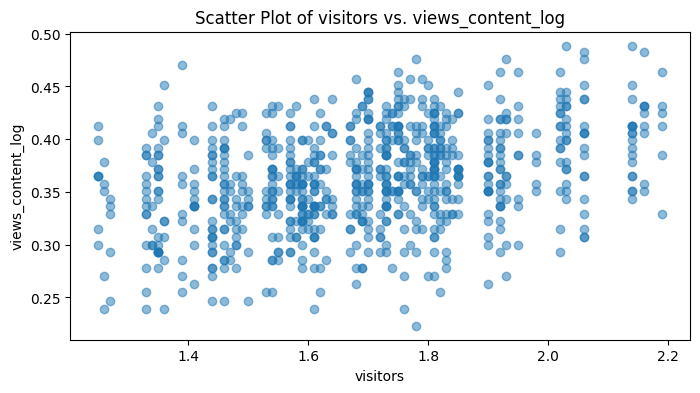

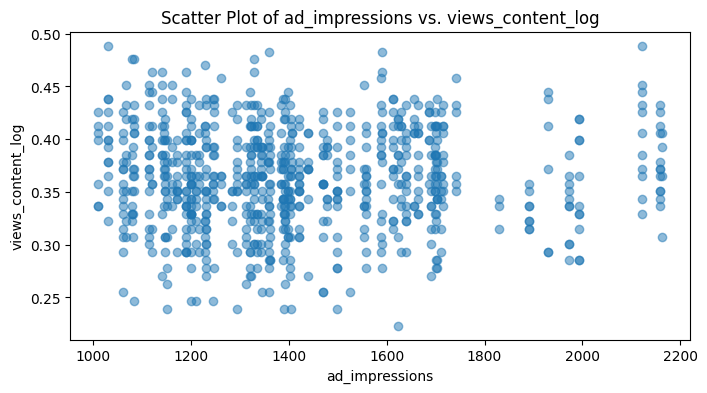

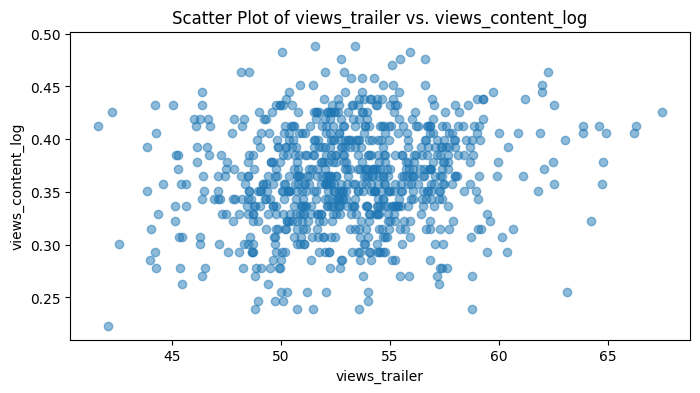

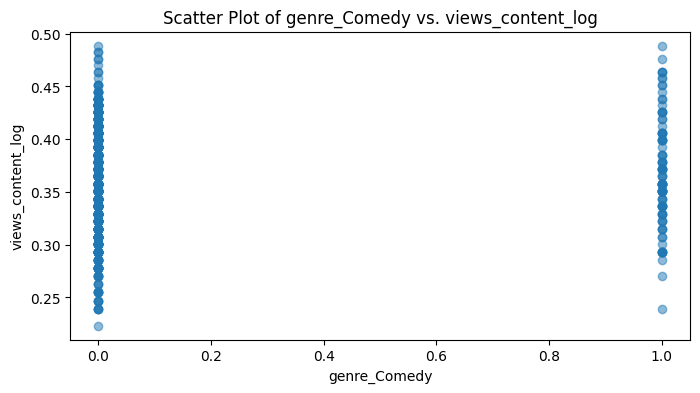

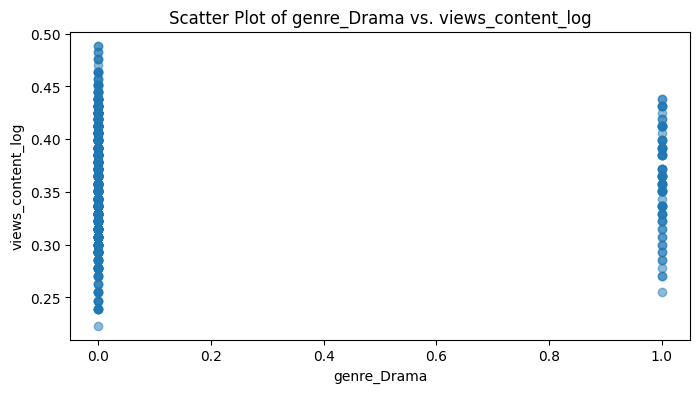

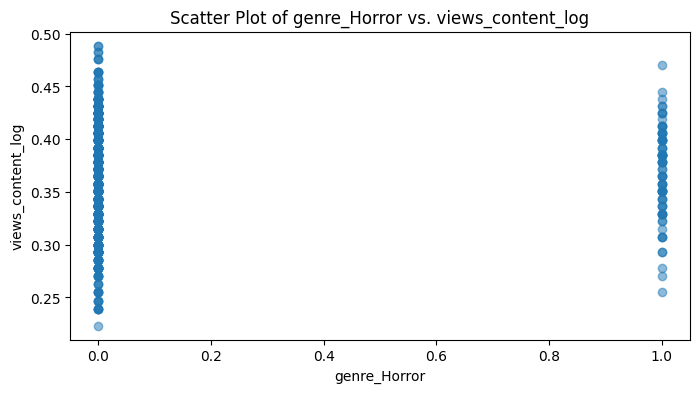

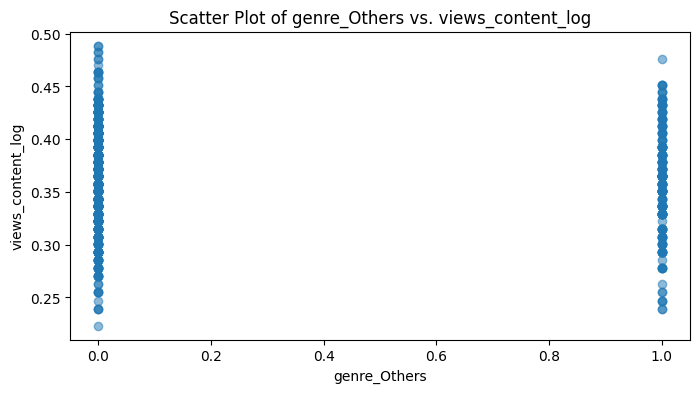

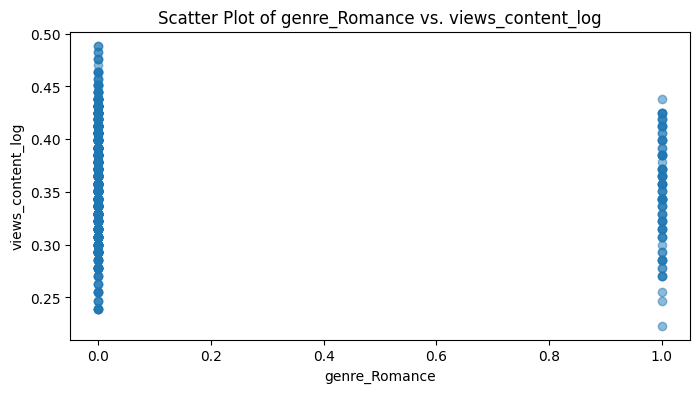

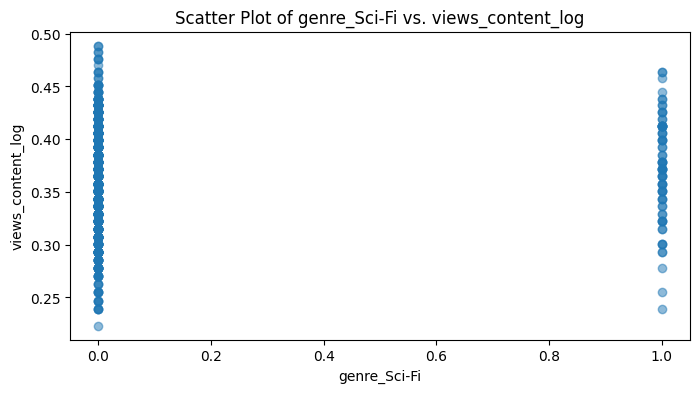

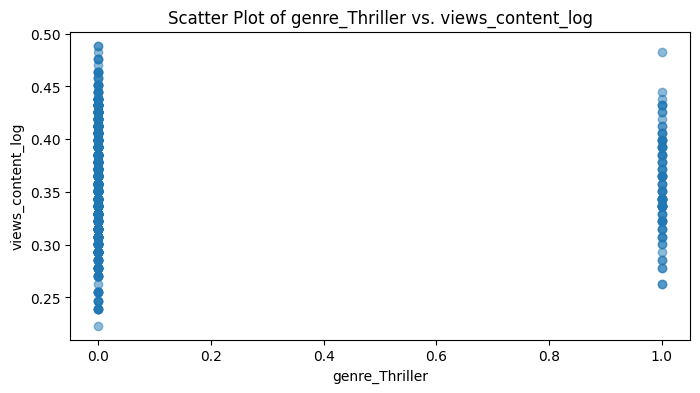

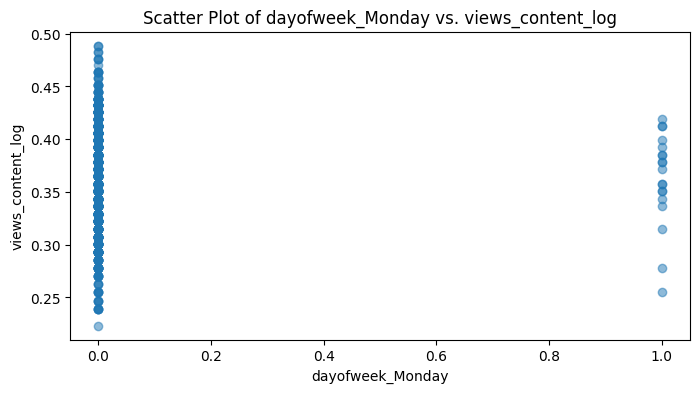

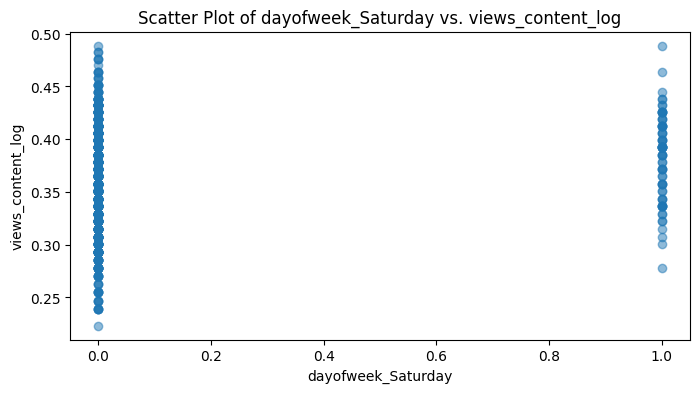

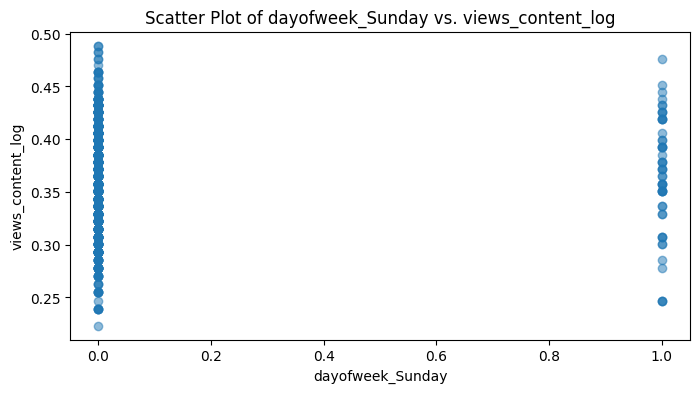

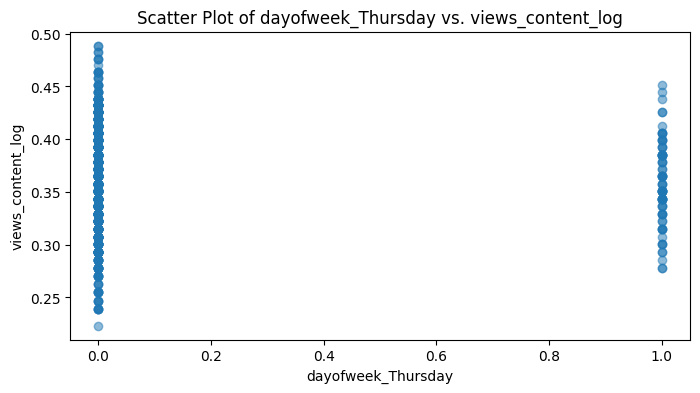

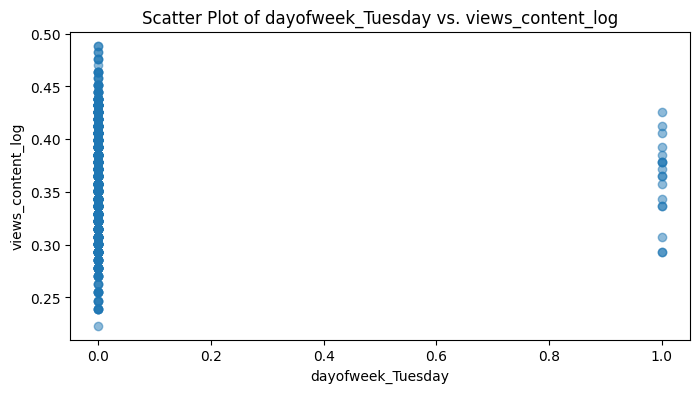

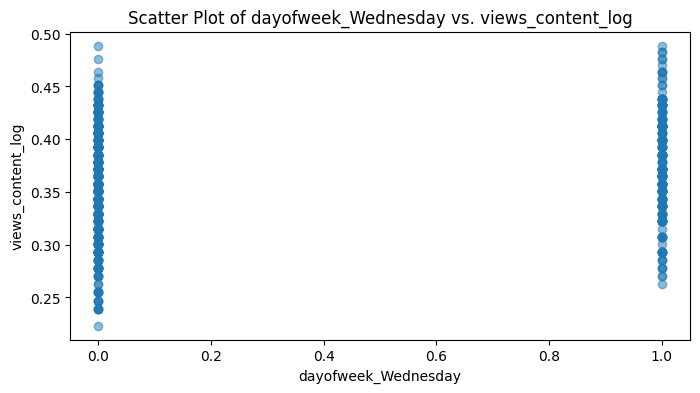

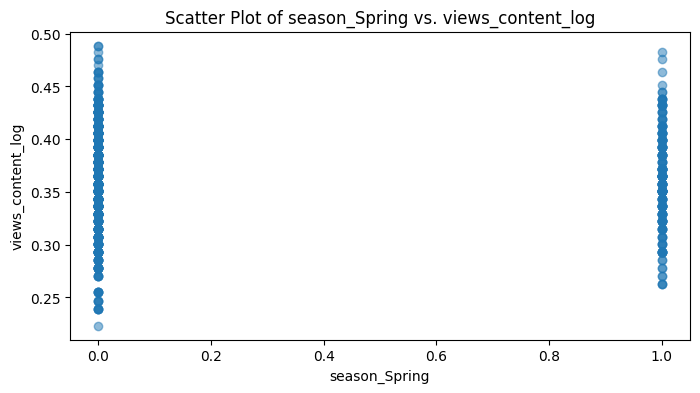

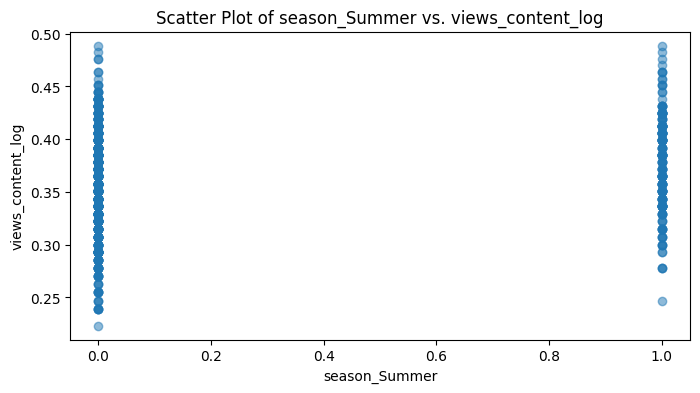

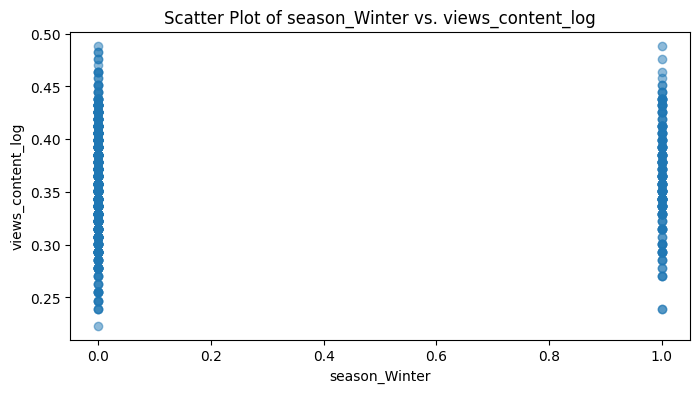

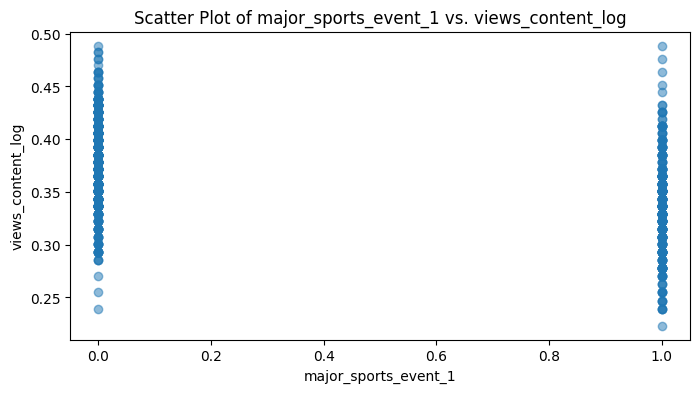

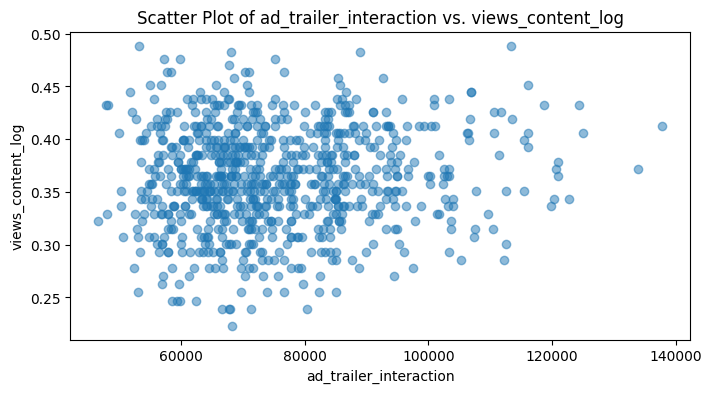

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting scatter plots for each feature against the target variable
features = X.columns
for feature in features:
    plt.figure(figsize=(8, 4))
    plt.scatter(data[feature], data['views_content_log'], alpha=0.5)
    plt.title(f'Scatter Plot of {feature} vs. views_content_log')
    plt.xlabel(feature)
    plt.ylabel('views_content_log')
    plt.show()

## **Independance**

In [18]:
from statsmodels.stats.stattools import durbin_watson

# Add a constant to the model (for statsmodels)
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_scaled)
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Durbin-Watson test
dw = durbin_watson(model_sm.resid)
print(f'Durbin-Watson Statistic: {dw:.2f}')

Durbin-Watson Statistic: 2.01


## **Homoscedasticity (Constant Variance of Errors)**

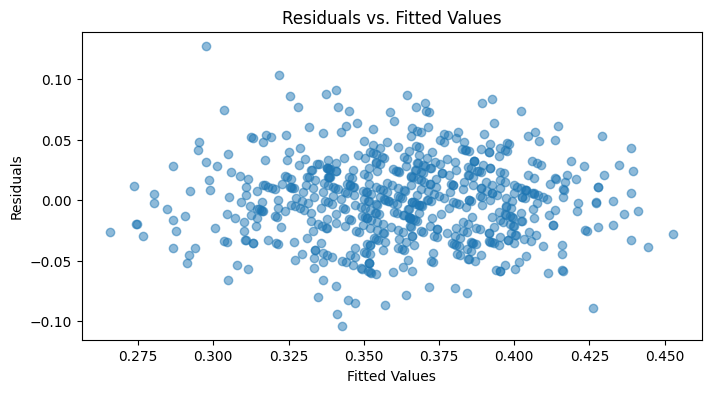

Breusch-Pagan Test Statistic: 25.12
Breusch-Pagan p-value: 0.24


In [19]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Residuals and fitted values
fitted_values = model_sm.fittedvalues
residuals = model_sm.resid

# Plot residuals vs. fitted values
plt.figure(figsize=(8, 4))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Breusch-Pagan test
bp_test = het_breuschpagan(residuals, model_sm.model.exog)
print(f'Breusch-Pagan Test Statistic: {bp_test[0]:.2f}')
print(f'Breusch-Pagan p-value: {bp_test[1]:.2f}')

## **Normality of Residuals**

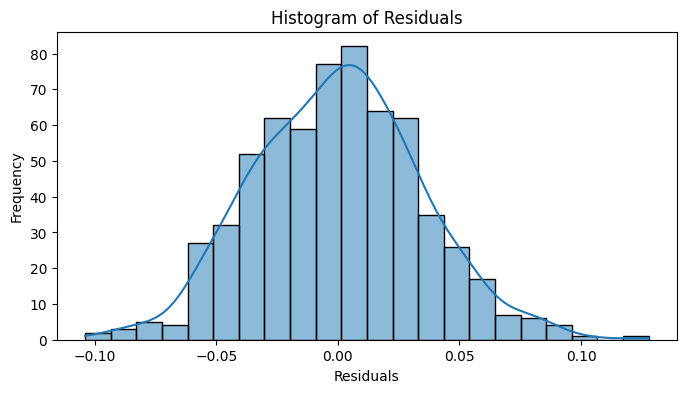

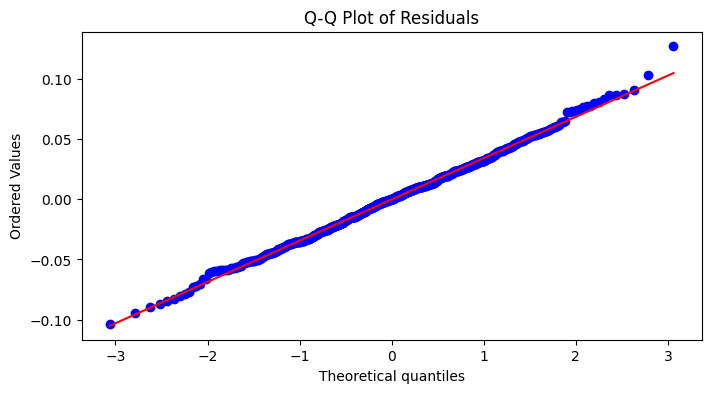

Shapiro-Wilk Test Statistic: 1.00
Shapiro-Wilk p-value: 0.65


In [20]:
from scipy.stats import shapiro

# Histogram of residuals
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
import scipy.stats as stats
plt.figure(figsize=(8, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk test
shapiro_test = shapiro(residuals)
print(f'Shapiro-Wilk Test Statistic: {shapiro_test[0]:.2f}')
print(f'Shapiro-Wilk p-value: {shapiro_test[1]:.2f}')

In [21]:
# Mean Absolute Error (MAE)

from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Mean Squared Error (MSE)

from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Root Mean Squared Error (RMSE)

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# R-squared (R²)

from sklearn.metrics import r2_score

# Calculate R²
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.2f}")

#  Adjusted R-squared

# Calculate Adjusted R²
n = X_test.shape[0]  # Number of observations
p = X_test.shape[1]  # Number of predictors
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared (Adjusted R²): {adj_r2:.2f}")

Mean Absolute Error (MAE): 0.03
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.03
R-squared (R²): 0.49
Adjusted R-squared (Adjusted R²): 0.42


Mean Absolute Error (MAE): 0.03
Average prediction error is 0.03 million views, indicating the model's predictions are close to actual values.

Mean Squared Error (MSE): 0.00
Indicates very small squared differences, but this might suggest data issues or overfitting.

Root Mean Squared Error (RMSE): 0.03
Typical prediction error magnitude is 0.03 million views, confirming the model's accuracy.

R-squared (R²): 0.49
The model explains 49% of the variance in first-day viewership, showing moderate explanatory power.

Adjusted R-squared (Adjusted R²): 0.42
Adjusted for the number of predictors, it explains 42% of the variance, reflecting a reasonable fit after accounting for complexity.

Overall, the model has low error rates and moderate explanatory power, but the MSE of 0.00 should be reviewed for potential issues.

In [ ]:
import numpy as np
import pandas as pd

# Assuming y_test and y_pred are your actual and predicted values
print("Sample of Actual Values:", y_test.head())
print("Sample of Predicted Values:", y_pred[:5])

# Compute MSE and check individual errors
errors = np.square(y_test - y_pred)
print("Sample Errors:", errors[:5])
print("Mean Squared Error (MSE):", np.mean(errors))

Sample of Actual Values: 956    0.371564
50     0.392042
278    0.418710
265    0.314811
305    0.371564
Name: views_content_log, dtype: float64
Sample of Predicted Values: [0.36538043 0.38415823 0.4058395  0.34909128 0.36074627]
Sample Errors: 956    0.000038
50     0.000062
278    0.000166
265    0.001175
305    0.000117
Name: views_content_log, dtype: float64
Mean Squared Error (MSE): 0.001111850386174515


# **Model Performance Evaluation**

**Mean Absolute Error (MAE): 0.03**

The average prediction error is 0.03 million views, indicating relatively accurate predictions.

**Mean Squared Error (MSE): 0.00**

Very low squared errors, which might indicate precise predictions, though it could also suggest potential overfitting or data issues.

**Root Mean Squared Error (RMSE): 0.03**

The typical error in the predictions is about 0.03 million views, reinforcing that the model is making accurate predictions.

**R-squared (R²): 0.49**

The model explains 49% of the variability in first-day viewership, suggesting moderate predictive power.

**Adjusted R-squared (Adjusted R²): 0.42**

After adjusting for the number of predictors, the model explains 42% of the variance, indicating reasonable fit while accounting for model complexity.

**Key Insights:**

The low error rates (MAE, RMSE) suggest good accuracy.

The MSE close to 0 could imply overfitting, so it’s worth checking the model
for potential issues.

R² and Adjusted R² show moderate explanatory power, meaning the model explains a reasonable portion of the variation in the data but can be improved